# Projeto 1 - Ciência dos Dados

#### Nome: Diogo Nobre de Araujo Cintra

## Introdução

Foi escolhido o grupo dos BRICS para ser estudado neste projeto. 
Países membros: Brasil, Rússia, China e África do Sul.
O primeiro encontro dos presidentes de cada país ocorreu em 16 de junho de 2009 na Rússia, neste encontro a África do sul ainda não tinha entrado neste grupo político. Foi apenas em 24 de dezembro de 2010 que a África do Sul se tornou membro oficial do então conhecido país emergentes ou BRICS.

A criação dos BRICS foi pelo fato de seus países membros terem índices semelhantes como crescimento industrial, PIB per capta e infraestrutura. Essas características de índices semelhantes entre esses países definiram o que conhecemos como país emergente. Em teoria fazer parte dos BRICS gerou alguns benefícios, como a criação do Novo Banco de Desenvolvimento do BRICS, por intermédio do banco, busca-se mobilizar recursos para incrementar o aporte de investimentos em infraestrutura e desenvolvimento sustentável nos países do BRICS e criação do Arranjo Contingente de Reservas, esse arranjo visa a respaldar os países membros, especificamente em eventuais cenários de crise em seus balanços de pagamentos.

## Pergunta a ser respondida

Como a formação dos BRICS influenciou o crescimento dos países membros ?

## Explicação da hipótese e mecanismo

### Hipótese
A criação dos BRICS foi pela semelhança econômica e social entre seus países membros. Dessa forma com a união desses países os crescimentos econômicos seriam semelhantes durante e após a formação do grupo.

### Mecanismo
Caso ocorra o que foi proposto pela hipótese, o crescimento econômico dos países deve-se ao fato de acordos e benefícios gerados pelo o grupo como: a criação do Novo Banco de Desenvolvimento do BRICS, criação do Arranjo Contingente de Reservas e maior visibilidade para investimentos, uma vez que esses países estão emergindo na economia global, portanto são economicamente atraentes. Para verificar se isso ocorreu, será analisado como foram os crescimentos dos índices que caracterizam um país como emergente, antes e depois da formação do grupo.

http://engemausp.submissao.com.br/17/anais/arquivos/66.pdf
(Não sei colocar em ABNT)

## Bases de dados usadas

https://www.gapminder.org/data/

## Análise de dados

### Importando as bibliotecas

In [295]:
%matplotlib inline
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import os
from numpy import arange
from numpy import percentile
import numpy as np

### Lendo os dados

In [288]:
GDPCAPTA = pd.read_excel('gdpcapta.xlsx')
IDH = pd.read_excel('idh.xlsx')
INTERNET = pd.read_excel('usuariosinternet.xlsx')
INDUSTRIA = pd.read_excel('industria.xlsx')
INVESTIMENTO = pd.read_excel('investimento.xlsx')
GDP = pd.read_excel('gdp.xlsx')

#### Nota
Os países Equador e Chile também foram utilizados na analise dos dados, para fins de comparação com os países que pertencem aos BRICS. Dessa forma verificando se caso os índices econômicos e sociais dos BRICS cresceram, foi pela causa da criação desse grupo político ou algo externo que afetou outros países.

### Filtrando a base de dados

In [190]:
gdpcapta = GDPCAPTA.set_index('country')
BRICSGDP1 = gdpcapta.loc[['Brazil','Russia','India','China','South Africa','Ecuador','Chile']]
BRICSGDP2 = BRICSGDP1.transpose()
BRICSGDP4 = BRICSGDP2.iloc[40:54]

idh = IDH.set_index('country')
BRICSIDH1 = idh.loc[['Brazil','Russia','India','China','South Africa','Ecuador','Chile']]
BRICSIDH2 = BRICSIDH1.transpose()
BRICSIDH4 = BRICSIDH2.iloc[10:24]

internet = INTERNET.set_index('country')
BRICSNET1 = internet.loc[['Brazil','Russia','India','China','South Africa','Ecuador','Chile']]
BRICSNET2 = BRICSNET1.transpose()
BRICSNET4 = BRICSNET2.iloc[10:24]

industria = INDUSTRIA.set_index('country')
BRICSIND1 = industria.loc[['Brazil','Russia','India','China','South Africa','Ecuador','Chile']]
BRICSIND2 = BRICSIND1.transpose()
BRICSIND4 = BRICSIND2.iloc[40:54]

investimento = INVESTIMENTO.set_index('country')
BRICSINVEST1 = investimento.loc[['Brazil','Russia','India','China','South Africa','Ecuador','Chile']]
BRICSINVEST2 = BRICSINVEST1.transpose()
BRICSINVEST4 = BRICSINVEST2.iloc[40:54]

gdp = GDP.set_index('country')
GDP1 = gdp.loc[['Brazil','Russia','India','China','South Africa','Ecuador','Chile']]
GDP2 = GDP1.transpose()
GDP3 = GDP2.iloc[40:54]

In [445]:
gdpcapta_1 = GDPCAPTA.set_index('country')
BRICSGDP1_1 = gdpcapta_1.loc[['Brazil','Russia','India','China','South Africa']]
BRICSGDP2_1 = BRICSGDP1_1.transpose()
BRICSGDP4_1 = BRICSGDP2_1.iloc[39:54]

idh_1 = IDH.set_index('country')
BRICSIDH1_1 = idh_1.loc[['Brazil','Russia','India','China','South Africa']]
BRICSIDH2_1 = BRICSIDH1_1.transpose()
BRICSIDH4_1 = BRICSIDH2_1.iloc[9:24]

internet_1 = INTERNET.set_index('country')
BRICSNET1_1 = internet_1.loc[['Brazil','Russia','India','China','South Africa']]
BRICSNET2_1 = BRICSNET1_1.transpose()
BRICSNET4_1 = BRICSNET2_1.iloc[9:24]

industria_1 = INDUSTRIA.set_index('country')
BRICSIND1_1 = industria_1.loc[['Brazil','Russia','India','China','South Africa']]
BRICSIND2_1 = BRICSIND1_1.transpose()
BRICSIND4_1 = BRICSIND2_1.iloc[39:54]

investimento_1 = INVESTIMENTO.set_index('country')
BRICSINVEST1_1 = investimento_1.loc[['Brazil','Russia','India','China','South Africa']]
BRICSINVEST2_1 = BRICSINVEST1_1.transpose()
BRICSINVEST4_1 = BRICSINVEST2_1.iloc[39:54]

gdp_1 = GDP.set_index('country')
GDP1_1 = gdp_1.loc[['Brazil','Russia','India','China','South Africa']]
GDP2_1 = GDP1_1.transpose()
GDP3_1 = GDP2_1.iloc[39:54]

### Filtrando os dados para 2010

In [446]:
BRICSGDP5 = BRICSGDP4[BRICSGDP4.index == 2010]
BRICSGDP6 = BRICSGDP5.transpose()
BRICSIDH5 = BRICSIDH4[BRICSIDH4.index == 2010]
BRICSIDH6 = BRICSIDH5.transpose()
BRICSNET5 = BRICSNET4[BRICSNET4.index == 2010]
BRICSNET6 = BRICSNET5.transpose()
BRICSIND5 = BRICSIND4[BRICSIND4.index == 2010]
BRICSIND6 = BRICSIND5.transpose()
BRICSINVEST5 = BRICSINVEST4[BRICSINVEST4.index == 2010]
BRICSINVEST6 = BRICSINVEST5.transpose()
GDP5 = GDP3[GDP3.index == 2010]
GDP6 = GDP5.transpose()

BRICS2010_1 = BRICSGDP6.join(BRICSIDH6, how='outer', lsuffix='_GDPCAPTA', rsuffix='_IDH')
BRICS2010_2 = BRICS2010_1.join(BRICSNET6, how='outer')
BRICS2010_2.rename(columns={2010:'2010_NET'}, inplace=True)
BRICS2010_3 = BRICS2010_2.join(BRICSIND6, how='outer')
BRICS2010_3.rename(columns={2010:'2010_IND'}, inplace=True)
BRICS2010_4 = BRICS2010_3.join(BRICSINVEST6, how='outer')
BRICS2010_4.rename(columns={2010:'2010_INVEST'}, inplace=True) 
BRICS2010_6 = BRICS2010_4.join(GDP6, how='outer')
BRICS2010_6.rename(columns={2010:'2010_GDP'}, inplace=True)

### Filtrando os dados para 2013

In [449]:
BRICSGDP5 = BRICSGDP4[BRICSGDP4.index == 2013]
BRICSGDP6 = BRICSGDP5.transpose()
BRICSIDH5 = BRICSIDH4[BRICSIDH4.index == 2013]
BRICSIDH6 = BRICSIDH5.transpose()
BRICSNET5 = BRICSNET4[BRICSNET4.index == 2013]
BRICSNET6 = BRICSNET5.transpose()
BRICSIND5 = BRICSIND4[BRICSIND4.index == 2013]
BRICSIND6 = BRICSIND5.transpose()
BRICSINVEST5 = BRICSINVEST4[BRICSINVEST4.index == 2013]
BRICSINVEST6 = BRICSINVEST5.transpose()
GDP7 = GDP3[GDP3.index == 2013]
GDP8 = GDP7.transpose()

BRICS2013_1 = BRICSGDP6.join(BRICSIDH6, how='outer', lsuffix='_GDPCAPTA', rsuffix='_IDH')
BRICS2013_2 = BRICS2013_1.join(BRICSNET6, how='outer')
BRICS2013_2.rename(columns={2013:'2013_NET'}, inplace=True)
BRICS2013_3 = BRICS2013_2.join(BRICSIND6, how='outer')
BRICS2013_3.rename(columns={2013:'2013_IND'}, inplace=True)
BRICS2013_4 = BRICS2013_3.join(BRICSINVEST6, how='outer')
BRICS2013_4.rename(columns={2013:'2013_INVEST'}, inplace=True) 
BRICS2013_6 = BRICS2013_4.join(GDP8, how='outer')
BRICS2013_6.rename(columns={2013:'2013_GDP'}, inplace=True)

BRICS2013 = BRICS2013_6[(BRICS2013_6['2013_GDPCAPTA']>=1350) & (BRICS2013_6['2013_IDH'] >= 0.58)& (BRICS2013_6['2013_GDP'] >= 3.750000e+11)]
BRICS_2010_2013_6 = BRICS2010_6.join(BRICS2013_6) 

### Representação gráfica dos dados 

#### Comparação dos dados entre 2010 e 2013

Text(0.5, 1.0, 'Comparação do PIB per capta dos países Equador, Chile e membros dos BRICS em 2010 e 2013')

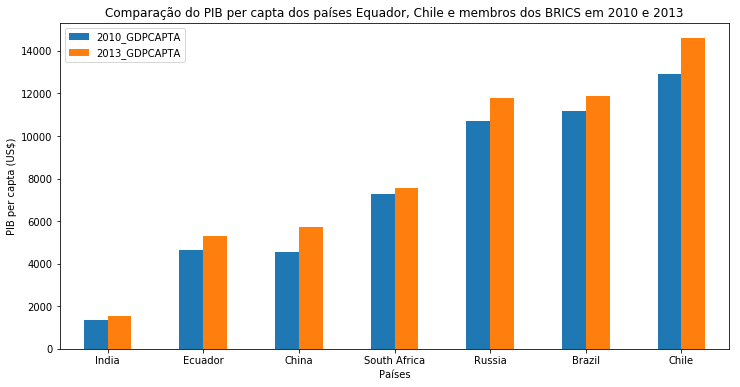

In [450]:
gdpCAPTA = BRICS_2010_2013_6[['2010_GDPCAPTA', '2013_GDPCAPTA']].sort_values(by='2013_GDPCAPTA')
gdpCAPTA.plot.bar(figsize=(12, 6),rot=0, label='fr')
plt.legend(loc='upper left')
plt.xlabel("Países")
plt.ylabel("PIB per capta (US$)")
plt.title("Comparação do PIB per capta dos países Equador, Chile e membros dos BRICS em 2010 e 2013")

Como pode-se observar no gráfico acima, o qual faz uma comparação direta entre o PIB per capta de 2010 e 2013, ocorreu um crescimento do PIB per capta em todos os países pertencentes dos BRICS, Chile e Equador. Assim não é possível afirmar que tal crescimento foi em virtude da formação dos BRICS. 

Text(0.5, 1.0, 'Comparação do IDH dos países Equador, Chile e membros dos BRICS em 2010 e 2013')

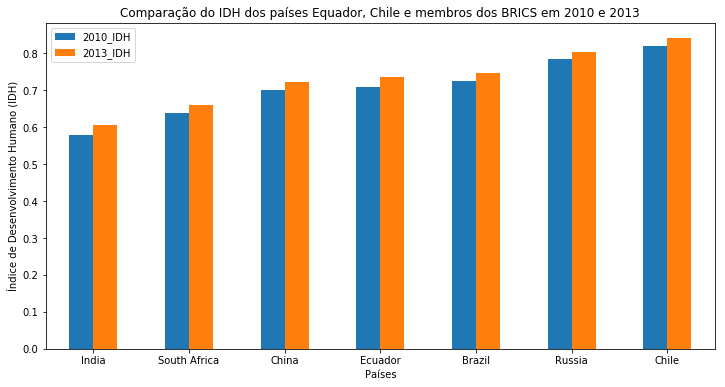

In [451]:
idh1 = BRICS_2010_2013_6[['2010_IDH', '2013_IDH']].sort_values(by='2013_IDH')
idh1.plot.bar(figsize=(12, 6),rot=0)
plt.legend(loc='upper left')
plt.xlabel("Países")
plt.ylabel("Índice de Desenvolvimento Humano (IDH)")
plt.title("Comparação do IDH dos países Equador, Chile e membros dos BRICS em 2010 e 2013")

Com o gráfico acima pode-se visualizar como o IDH dos países em 2010 e 2013 mudou, porém com este gráfico fica difícil fazer uma análise quantitativa do percentual de crescimento de cada país. E novamente não se pode afirmar que tal aumento no IDH foi causado pela formação dos BRICS.

Text(0.5, 1.0, 'Comparação da porcentagemde pessoas que possuem acesso a internet nos países Equador, Chile e membros dos BRICS em 2010 e 2013')

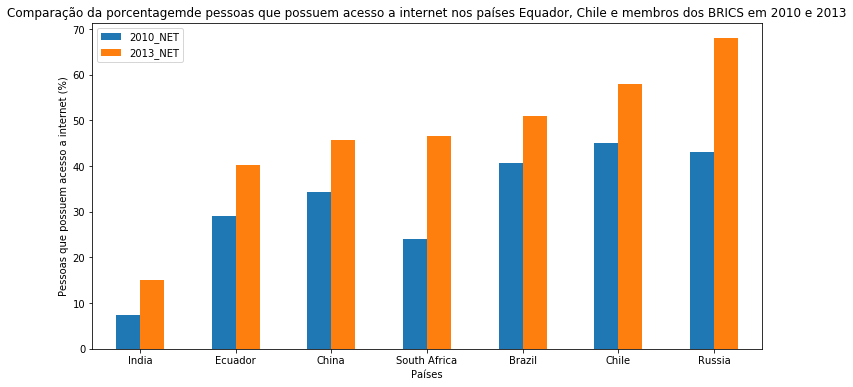

In [452]:
net1 = BRICS_2010_2013_6[['2010_NET', '2013_NET']].sort_values(by='2013_NET')
net1.plot.bar(figsize=(12, 6),rot=0)
plt.legend(loc='upper left')
plt.xlabel("Países")
plt.ylabel("Pessoas que possuem acesso a internet (%)")
plt.title("Comparação da porcentagemde pessoas que possuem acesso a internet nos países Equador, Chile e membros dos BRICS em 2010 e 2013")

Observando o gráfico acima, o qual compara o percentual de usuários de internet em 2010 e 2013, fica qualitativamente que ocorreu uma mudança significa de um ano para o outro. Porém como ocorreu um aumento desse percentual em todos os países analisados, não se pode afirmar que a ocorrência desse fenômeno foi pela formação dos BRICS. 

Text(0.5, 1.0, 'Representação do setor industrial no PIB dos países Equador, Chile e membros dos BRICS em 2010 e 2013')

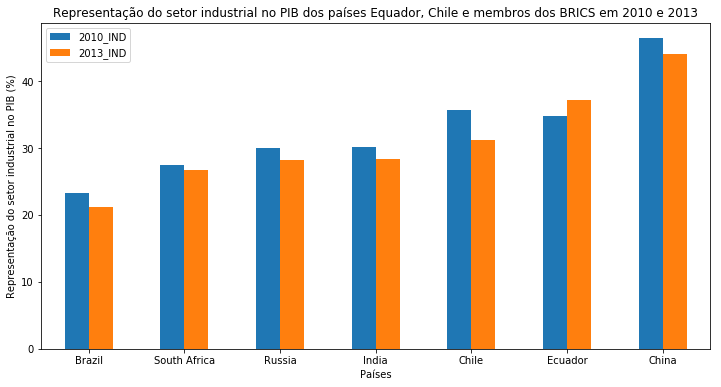

In [453]:
ind1 = BRICS_2010_2013_6[['2010_IND', '2013_IND']].sort_values(by='2013_IND')
ind1.plot.bar(figsize=(12, 6),rot=0)
plt.legend(loc='upper left')
plt.xlabel("Países")
plt.ylabel("Representação do setor industrial no PIB (%)")
plt.title("Representação do setor industrial no PIB dos países Equador, Chile e membros dos BRICS em 2010 e 2013")

Uma grande característica dos BRICS é o crescimento industrial acelerado e/ou o forte potencial de crescimento. Porém o gráfico acima demonstra que ocorreu um baixo decrescimento do setor industrial com exceção do Equador.  Contudo, a causa desse decrescimento pode ser algum fator externo que afetou os BRICS e outros países.

Text(0.5, 1.0, 'Investimento nos países Equador, Chile e membros dos BRICS em 2010 e 2013')

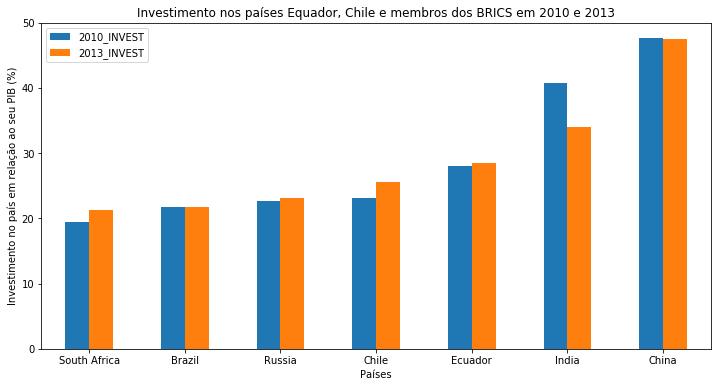

In [454]:
invest1 = BRICS_2010_2013_6[['2010_INVEST', '2013_INVEST']].sort_values(by='2013_INVEST')
invest1.plot.bar(figsize=(12, 6),rot=0)
plt.legend(loc='upper left')
plt.xlabel("Países")
plt.ylabel("Investimento no país em relação ao seu PIB (%)")
plt.title("Investimento nos países Equador, Chile e membros dos BRICS em 2010 e 2013")

Segundo o mecanismo para explicar a hipótese, a formação dos BRICS deveria colocar seus países membros em posição de destaque, causando um aumento nos investimentos nos países. Porém o gráfico acima mostra o oposto do que foi proposto ou ocorreu um pequeno aumento nos investimentos no país.

Text(0.5, 1.0, 'PIB dos países Equador, Chile e membros dos BRICS em 2010 e 2013')

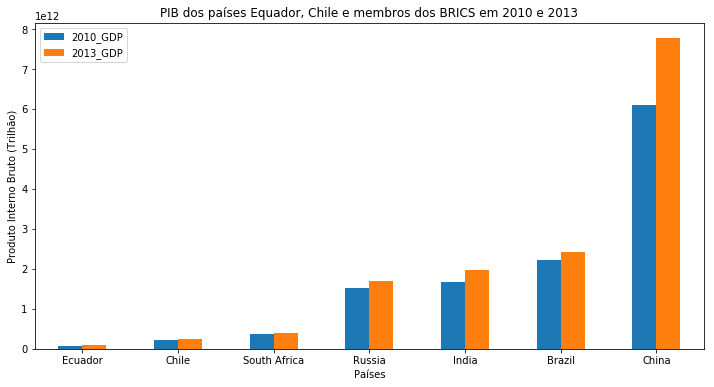

In [455]:
gdp1 = BRICS_2010_2013_6[['2010_GDP', '2013_GDP']].sort_values(by='2013_GDP')
gdp1.plot.bar(figsize=(12, 6),rot=0)
plt.legend(loc='upper left')
plt.xlabel("Países")
plt.ylabel("Produto Interno Bruto (Trilhão)")
plt.title("PIB dos países Equador, Chile e membros dos BRICS em 2010 e 2013")

O gráfico acima mostra como mudou o PIB dos países membros do BRICS, Chile e Equador. Esse gráfico mostra como a China vem se tornando uma grande potência econômica e se distanciando de um país com característica econômicas dos demais BRICS e emergindo como um país desenvolvido.

#### Calculando o crescimento entre 2010 e 2013

In [456]:
crescgdpCAPTA1 = (gdpCAPTA['2013_GDPCAPTA']*100)/gdpCAPTA['2010_GDPCAPTA']-100
crescgdpCAPTA2 = crescgdpCAPTA1.to_frame()
crescgdpCAPTA2.rename(columns={0:'GDPCAPTA'}, inplace=True)
#crescgdpCAPTA2
crescidh1 = (idh1['2013_IDH']*100)/idh1['2010_IDH']-100
crescidh2 = crescidh1.to_frame()
crescidh2.rename(columns={0:'IDH'}, inplace=True)
#crescidh2
crescnet1 = (net1['2013_NET']*100)/net1['2010_NET']-100
crescnet2 = crescnet1.to_frame()
crescnet2.rename(columns={0:'NET'}, inplace=True)
#crescnet2
crescind1 = (ind1['2013_IND']*100)/ind1['2010_IND']-100
crescind2 = crescind1.to_frame()
crescind2.rename(columns={0:'IND'}, inplace=True)
#crescnet2
crescinvest1 = (invest1['2013_INVEST']*100)/invest1['2010_INVEST']-100
crescinvest2 = crescinvest1.to_frame()
crescinvest2.rename(columns={0:'INVEST'}, inplace=True)
#crescnet2
crescgdp1 = (gdp1['2013_GDP']*100)/gdp1['2010_GDP']-100
crescgdp2 = crescgdp1.to_frame()
crescgdp2.rename(columns={0:'GDP'}, inplace=True)
#crescnet2

#### Comparação do crescimento dos dados de 2010 para 2013

Text(0.5, 1.0, 'Comparação do crescimento em % do PIB per capta dos países Equador, Chile e membros dos BRICS de 2010 para 2013')

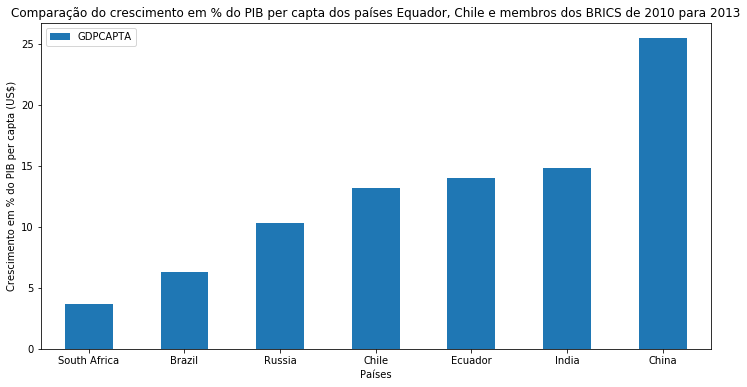

In [457]:
crescgdpCAPTA3 = crescgdpCAPTA2.sort_values(by='GDPCAPTA')
crescgdpCAPTA3.plot.bar(figsize=(12, 6),rot=0)
plt.legend(loc='upper left')
plt.xlabel("Países")
plt.ylabel("Crescimento em % do PIB per capta (US$)")
plt.title("Comparação do crescimento em % do PIB per capta dos países Equador, Chile e membros dos BRICS de 2010 para 2013")

O gráfico acima mostra o crescimento do PIB per capta de 2010 até 2013. Como pode-se observar, a China foi o grande destaque cresceu 25%. A Índia e a Rússia cresceram algo próximo dos 15%, já o Brasil e a África do Sul cresceram em média 5,75%. Esses resultados mostram que o crescimento do PIB per capta dos países pertencentes aos BRICS não foram uniforme entre si, porém ao ser comparado com o Chile e o Equador em média, com exceção da China, os países dos BRICS cresceram aproximadamente igualmente.  

Text(0.5, 1.0, 'Comparação do crescimento em % do PIB per capta dos países Equador, Chile e membros dos BRICS de 2010 para 2013')

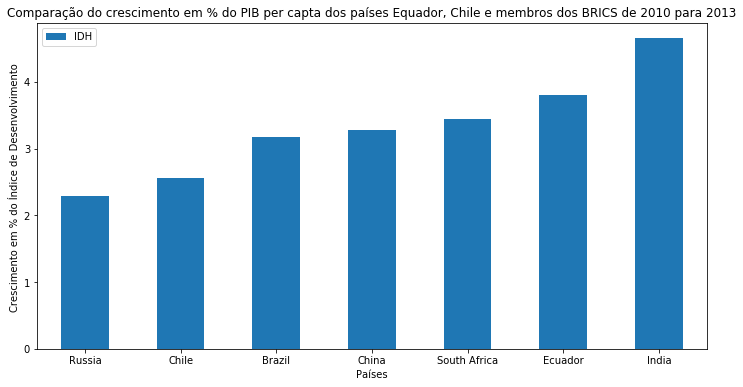

In [458]:
crescidh3 = crescidh2.sort_values(by='IDH')
crescidh3.plot.bar(figsize=(12, 6),rot=0)
plt.legend(loc='upper left')
plt.xlabel("Países")
plt.ylabel("Crescimento em % do Índice de Desenvolvimento ")
plt.title("Comparação do crescimento em % do PIB per capta dos países Equador, Chile e membros dos BRICS de 2010 para 2013")

Com relação ao crescimento do IDH, o gráfico acima mostra claramente que os países pertencentes aos BRICS e países que não pertencem, cresceram igualmente em média entre os anos de 2000 a 2013. Dessa forma não é possível afirmar que tais crescimentos são justificados pela formação do grupo político. 

Text(0.5, 1.0, 'Comparação da porcentagemde pessoas que possuem acesso a internet nos países Equador, Chile e membros dos BRICS em 2010 e 2013')

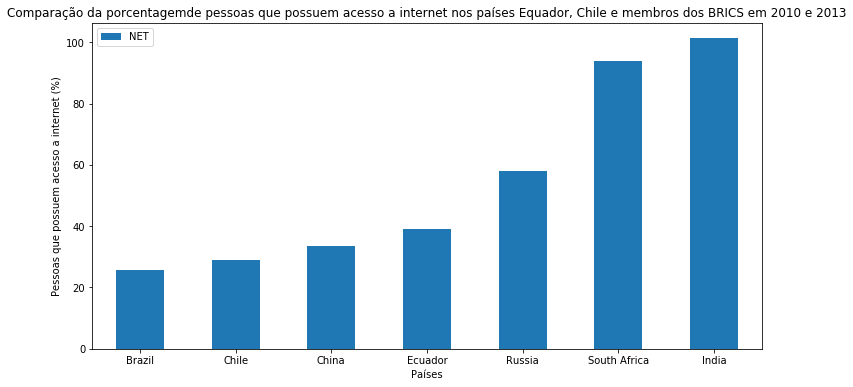

In [459]:
crescnet3 = crescnet2.sort_values(by='NET')
crescnet3.plot.bar(figsize=(12, 6),rot=0)
plt.legend(loc='upper left')
plt.xlabel("Países")
plt.ylabel("Pessoas que possuem acesso a internet (%)")
plt.title("Comparação da porcentagemde pessoas que possuem acesso a internet nos países Equador, Chile e membros dos BRICS em 2010 e 2013")

O gráfico acima mostra o grande crescimento de pessoas com acesso a internet, com destaque para a África do Sul e Índia. Isso prediz que ocorreu alto investimento de empresas de internet em ambos os países, na Índia pela sua grande população e na África do Sul pela baixa infraestrutura. Assim um investimento médio em telefonia em ambos os países causou um aumento considerável dos usuários de internet. 

Text(0.5, 1.0, 'Crescimento do setor industrial dos países Equador, Chile e membros dos BRICS em 2010 e 2013')

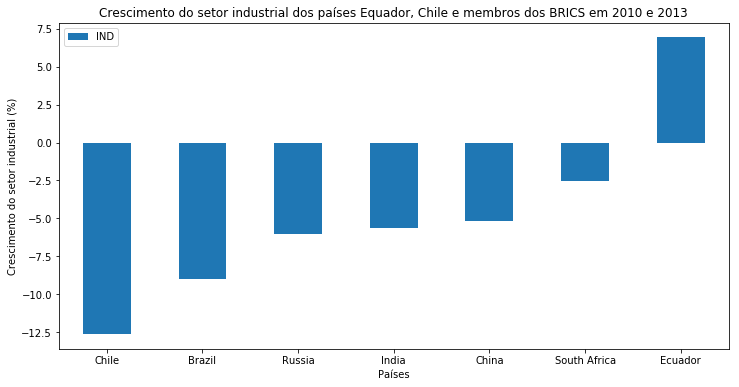

In [460]:
crescind3 = crescind2.sort_values(by='IND')
crescind3.plot.bar(figsize=(12, 6),rot=0)
plt.legend(loc='upper left')
plt.xlabel("Países")
plt.ylabel("Crescimento do setor industrial (%)")
plt.title("Crescimento do setor industrial dos países Equador, Chile e membros dos BRICS em 2010 e 2013")

Uma grande característica dos BRICS é seu potencial de industrialização e crescimento industrial acelerado. Porém quando analisamos o gráfico acime vemos exatamente o oposto. De 2010 para 2013 todos os países dos BRICS tiveram um decrescimento do setor industrial em seu PIB. Também ocorreu decréscimo do Chile e crescimento no Equador, assim mostrando que esse decrescimento que afetou os BRICS não foi causado pela sua formação.

Text(0.5, 1.0, 'Crescimento de investimento nos países Equador, Chile e membros dos BRICS em 2010 e 2013')

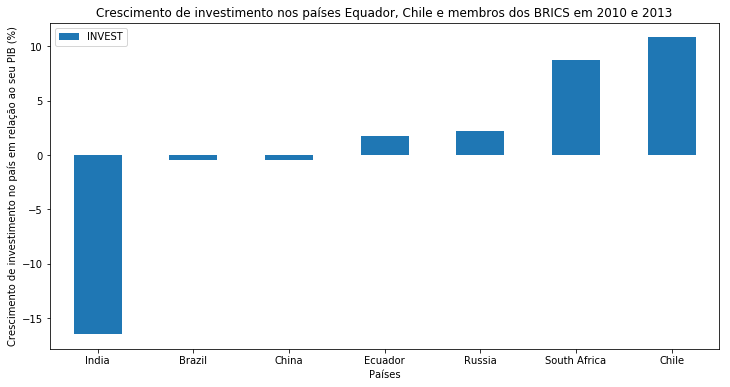

In [461]:
crescinvest3 = crescinvest2.sort_values(by='INVEST')
crescinvest3.plot.bar(figsize=(12, 6),rot=0)
plt.legend(loc='upper left')
plt.xlabel("Países")
plt.ylabel("Crescimento de investimento no país em relação ao seu PIB (%)")
plt.title("Crescimento de investimento nos países Equador, Chile e membros dos BRICS em 2010 e 2013")

O gráfico acima é muito curioso, pois mostra que o investimento nos BRICS foi extremamente baixo, na Índia ocorreu o oposto do que se postulava e na África do Sul foi onde teve o maior investimento.

Text(0.5, 1.0, 'Crescimento do PIB dos países Equador, Chile e membros dos BRICS em 2010 e 2013')

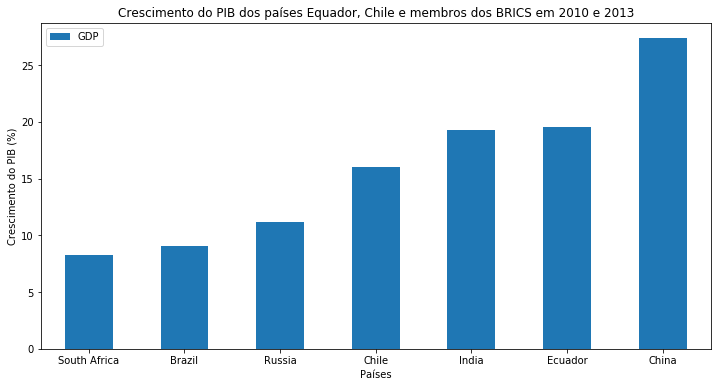

In [462]:
crescgdp3 = crescgdp2.sort_values(by='GDP')
crescgdp3.plot.bar(figsize=(12, 6),rot=0)
plt.legend(loc='upper left')
plt.xlabel("Países")
plt.ylabel("Crescimento do PIB (%)")
plt.title("Crescimento do PIB dos países Equador, Chile e membros dos BRICS em 2010 e 2013")

Como pode-se observar no gráfico acima, o crescimento do PIB foi grande na China, médio na Índia e aproximada mente igual nos demais países dos BRICS. Além disso os outros países em análise também tiveram um significativo aumento no PIB, dessa forma evidenciando novamente que a formação do grupo político não contribuiu para tais aumentos.

#### Comparação do crescimento dos dados de ano a ano entre 2000 e 2013

In [463]:
BRICSGDP4_2 = BRICSGDP4_1.transpose()
BRICSIDH4_2 = BRICSIDH4_1.transpose()
BRICSNET4_2 = BRICSNET4_1.transpose()
BRICSIND4_2 = BRICSIND4_1.transpose()
BRICSINVEST4_2 = BRICSINVEST4_1.transpose()
GDP2_2 = GDP3_1.transpose()

In [464]:
percgdpB1 = []
percgdpB2 = []
percgdpC1 = []
percgdpC2 = []
percgdpR1 = []
percgdpR2 = []
percgdpI1 = []
percgdpI2 = []
percgdpAS1 = []
percgdpAS2 = []

percidhB1 = []
percidhB2 = []
percidhC1 = []
percidhC2 = []
percidhR1 = []
percidhR2 = []
percidhI1 = []
percidhI2 = []
percidhAS1 = []
percidhAS2 = []

percnetB1 = []
percnetB2 = []
percnetC1 = []
percnetC2 = []
percnetR1 = []
percnetR2 = []
percnetI1 = []
percnetI2 = []
percnetAS1 = []
percnetAS2 = []

percindB1 = []
percindB2 = []
percindC1 = []
percindC2 = []
percindR1 = []
percindR2 = []
percindI1 = []
percindI2 = []
percindAS1 = []
percindAS2 = []

percinvB1 = []
percinvB2 = []
percinvC1 = []
percinvC2 = []
percinvR1 = []
percinvR2 = []
percinvI1 = []
percinvI2 = []
percinvAS1 = []
percinvAS2 = []

percgdp2B1 = []
percgdp2B2 = []
percgdp2C1 = []
percgdp2C2 = []
percgdp2R1 = []
percgdp2R2 = []
percgdp2I1 = []
percgdp2I2 = []
percgdp2AS1 = []
percgdp2AS2 = []


delta_t = 1
anos = np.arange(1999,2013,delta_t)

for e in BRICSGDP4_2:   
    percgdpB1.append(BRICSGDP4_1['Brazil'].loc[e])
    
for i in range(len(percgdpB1)):
    
    if (i+1) == 15:
        break;
    percgdpB2.append((percgdpB1[i+1]*100)/percgdpB1[i]-100)
    
#-----------------------------------------------------------#

for e in BRICSGDP4_2:   
    percgdpC1.append(BRICSGDP4_1['China'].loc[e])
    
for i in range(len(percgdpC1)):
    
    if (i+1) == 15:
        break;
    percgdpC2.append((percgdpC1[i+1]*100)/percgdpC1[i]-100)
    
#-----------------------------------------------------------#

for e in BRICSGDP4_2:   
    percgdpR1.append(BRICSGDP4_1['Russia'].loc[e])
    
for i in range(len(percgdpR1)):
    
    if (i+1) == 15:
        break;
    percgdpR2.append((percgdpR1[i+1]*100)/percgdpR1[i]-100)
    
#-----------------------------------------------------------#

for e in BRICSGDP4_2:   
    percgdpI1.append(BRICSGDP4_1['India'].loc[e])
    
for i in range(len(percgdpI1)):
    
    if (i+1) == 15:
        break;
    percgdpI2.append((percgdpI1[i+1]*100)/percgdpI1[i]-100)    
    
#-----------------------------------------------------------#
    
for e in BRICSGDP4_2:   
    percgdpAS1.append(BRICSGDP4_1['South Africa'].loc[e])
    
for i in range(len(percgdpAS1)):
    
    if (i+1) == 15:
        break;
    percgdpAS2.append((percgdpAS1[i+1]*100)/percgdpAS1[i]-100)
    
#-----------------------------------------------------------#

#############################################################

#-----------------------------------------------------------#


for e in BRICSIDH4_2:   
    percidhB1.append(BRICSIDH4_1['Brazil'].loc[e])
    
for i in range(len(percidhB1)):
    
    if (i+1) == 15:
        break;
    percidhB2.append((percidhB1[i+1]*100)/percidhB1[i]-100)
    
#-----------------------------------------------------------#

for e in BRICSIDH4_2:   
    percidhC1.append(BRICSIDH4_1['China'].loc[e])
    
for i in range(len(percidhC1)):
    
    if (i+1) == 15:
        break;
    percidhC2.append((percidhC1[i+1]*100)/percidhC1[i]-100)
    
#-----------------------------------------------------------#

for e in BRICSIDH4_2:   
    percidhR1.append(BRICSIDH4_1['Russia'].loc[e])
    
for i in range(len(percidhR1)):
    
    if (i+1) == 15:
        break;
    percidhR2.append((percidhR1[i+1]*100)/percidhR1[i]-100)
    
#-----------------------------------------------------------#

for e in BRICSIDH4_2:   
    percidhI1.append(BRICSIDH4_1['India'].loc[e])
    
for i in range(len(percidhI1)):
    
    if (i+1) == 15:
        break;
    percidhI2.append((percidhI1[i+1]*100)/percidhI1[i]-100)    
    
#-----------------------------------------------------------#
    
for e in BRICSIDH4_2:   
    percidhAS1.append(BRICSIDH4_1['South Africa'].loc[e])
    
for i in range(len(percidhAS1)):
    
    if (i+1) == 15:
        break;
    percidhAS2.append((percidhAS1[i+1]*100)/percidhAS1[i]-100)
    
#-----------------------------------------------------------#

#############################################################

#-----------------------------------------------------------#


for e in BRICSNET4_2:   
    percnetB1.append(BRICSNET4_1['Brazil'].loc[e])
    
for i in range(len(percnetB1)):
    
    if (i+1) == 15:
        break;
    percnetB2.append((percnetB1[i+1]*100)/percnetB1[i]-100)
    
#-----------------------------------------------------------#

for e in BRICSNET4_2:   
    percnetC1.append(BRICSNET4_1['China'].loc[e])
    
for i in range(len(percnetC1)):
    
    if (i+1) == 15:
        break;
    percnetC2.append((percnetC1[i+1]*100)/percnetC1[i]-100)
    
#-----------------------------------------------------------#

for e in BRICSNET4_2:   
    percnetR1.append(BRICSNET4_1['Russia'].loc[e])
    
for i in range(len(percnetR1)):
    
    if (i+1) == 15:
        break;
    percnetR2.append((percnetR1[i+1]*100)/percnetR1[i]-100)
    
#-----------------------------------------------------------#

for e in BRICSNET4_2:   
    percnetI1.append(BRICSNET4_1['India'].loc[e])
    
for i in range(len(percnetI1)):
    
    if (i+1) == 15:
        break;
    percnetI2.append((percnetI1[i+1]*100)/percnetI1[i]-100)    
    
#-----------------------------------------------------------#
    
for e in BRICSNET4_2:   
    percnetAS1.append(BRICSNET4_1['South Africa'].loc[e])
    
for i in range(len(percnetAS1)):
    
    if (i+1) == 15:
        break;
    percnetAS2.append((percnetAS1[i+1]*100)/percnetAS1[i]-100)
    
#-----------------------------------------------------------#

#############################################################

#-----------------------------------------------------------#


for e in BRICSIND4_2:   
    percindB1.append(BRICSIND4_1['Brazil'].loc[e])
    
for i in range(len(percindB1)):
    
    if (i+1) == 15:
        break;
    percindB2.append((percindB1[i+1]*100)/percindB1[i]-100)
    
#-----------------------------------------------------------#

for e in BRICSIND4_2:   
    percindC1.append(BRICSIND4_1['China'].loc[e])
    
for i in range(len(percindC1)):
    
    if (i+1) == 15:
        break;
    percindC2.append((percindC1[i+1]*100)/percindC1[i]-100)
    
#-----------------------------------------------------------#

for e in BRICSIND4_2:   
    percindR1.append(BRICSIND4_1['Russia'].loc[e])
    
for i in range(len(percindR1)):
    
    if (i+1) == 15:
        break;
    percindR2.append((percindR1[i+1]*100)/percindR1[i]-100)
    
#-----------------------------------------------------------#

for e in BRICSIND4_2:   
    percindI1.append(BRICSIND4_1['India'].loc[e])
    
for i in range(len(percindI1)):
    
    if (i+1) == 15:
        break;
    percindI2.append((percindI1[i+1]*100)/percindI1[i]-100)    
    
#-----------------------------------------------------------#
    
for e in BRICSIND4_2:   
    percindAS1.append(BRICSIND4_1['South Africa'].loc[e])
    
for i in range(len(percindAS1)):
    
    if (i+1) == 15:
        break;
    percindAS2.append((percindAS1[i+1]*100)/percindAS1[i]-100)
    
#-----------------------------------------------------------#

#############################################################

#-----------------------------------------------------------#


for e in BRICSINVEST4_2:   
    percinvB1.append(BRICSINVEST4_1['Brazil'].loc[e])
    
for i in range(len(percinvB1)):
    
    if (i+1) == 15:
        break;
    percinvB2.append((percinvB1[i+1]*100)/percinvB1[i]-100)
    
#-----------------------------------------------------------#

for e in BRICSINVEST4_2:   
    percinvC1.append(BRICSINVEST4_1['China'].loc[e])
    
for i in range(len(percinvC1)):
    
    if (i+1) == 15:
        break;
    percinvC2.append((percinvC1[i+1]*100)/percinvC1[i]-100)
    
#-----------------------------------------------------------#

for e in BRICSINVEST4_2:   
    percinvR1.append(BRICSINVEST4_1['Russia'].loc[e])
    
for i in range(len(percinvR1)):
    
    if (i+1) == 15:
        break;
    percinvR2.append((percinvR1[i+1]*100)/percinvR1[i]-100)
    
#-----------------------------------------------------------#

for e in BRICSINVEST4_2:   
    percinvI1.append(BRICSINVEST4_1['India'].loc[e])
    
for i in range(len(percinvI1)):
    
    if (i+1) == 15:
        break;
    percinvI2.append((percinvI1[i+1]*100)/percinvI1[i]-100)    
    
#-----------------------------------------------------------#
    
for e in BRICSINVEST4_2:   
    percinvAS1.append(BRICSINVEST4_1['South Africa'].loc[e])
    
for i in range(len(percinvAS1)):
    
    if (i+1) == 15:
        break;
    percinvAS2.append((percinvAS1[i+1]*100)/percinvAS1[i]-100)
    
#-----------------------------------------------------------#

############################################################

#-----------------------------------------------------------#

for e in GDP2_2:   
    percgdp2B1.append(GDP3_1['Brazil'].loc[e])
    
for i in range(len(percgdp2B1)):
    
    if (i+1) == 15:
        break;
    percgdp2B2.append((percgdp2B1[i+1]*100)/percgdp2B1[i]-100)
    
#-----------------------------------------------------------#

for e in GDP2_2:   
    percgdp2C1.append(GDP3_1['China'].loc[e])
    
for i in range(len(percgdp2C1)):
    
    if (i+1) == 15:
        break;
    percgdp2C2.append((percgdp2C1[i+1]*100)/percgdp2C1[i]-100)
    
#-----------------------------------------------------------#

for e in GDP2_2:   
    percgdp2R1.append(GDP3_1['Russia'].loc[e])
    
for i in range(len(percgdp2R1)):
    
    if (i+1) == 15:
        break;
    percgdp2R2.append((percgdp2R1[i+1]*100)/percgdp2R1[i]-100)
    
#-----------------------------------------------------------#

for e in GDP2_2:   
    percgdp2I1.append(GDP3_1['India'].loc[e])
    
for i in range(len(percgdp2I1)):
    
    if (i+1) == 15:
        break;
    percgdp2I2.append((percgdp2I1[i+1]*100)/percgdp2I1[i]-100)    
    
#-----------------------------------------------------------#
    
for e in GDP2_2:   
    percgdp2AS1.append(GDP3_1['South Africa'].loc[e])
    
for i in range(len(percgdp2AS1)):
    
    if (i+1) == 15:
        break;
    percgdp2AS2.append((percgdp2AS1[i+1]*100)/percgdp2AS1[i]-100)
    
#-----------------------------------------------------------#

incB1 = pd.DataFrame(percgdpB2)
incB1.rename(columns={0:'GDPCAPTA_BR'}, inplace=True)
incB2 = pd.DataFrame(percidhB2)
incB2.rename(columns={0:'IDH_BR'}, inplace=True)
incB3 = pd.DataFrame(percnetB2)
incB3.rename(columns={0:'NET_BR'}, inplace=True)
incB4 = pd.DataFrame(percindB2)
incB4.rename(columns={0:'IND_BR'}, inplace=True)
incB5 = pd.DataFrame(percinvB2)
incB5.rename(columns={0:'INVEST_BR'}, inplace=True)
incB6 = pd.DataFrame(percgdp2B2)
incB6.rename(columns={0:'GDP_BR'}, inplace=True)

incC1 = pd.DataFrame(percgdpC2)
incC1.rename(columns={0:'GDPCAPTA_CHN'}, inplace=True)
incC2 = pd.DataFrame(percidhC2)
incC2.rename(columns={0:'IDH_CHN'}, inplace=True)
incC3 = pd.DataFrame(percnetC2)
incC3.rename(columns={0:'NET_CHN'}, inplace=True)
incC4 = pd.DataFrame(percindC2)
incC4.rename(columns={0:'IND_CHN'}, inplace=True)
incC5 = pd.DataFrame(percinvC2)
incC5.rename(columns={0:'INVEST_CHN'}, inplace=True)
incC6 = pd.DataFrame(percgdp2C2)
incC6.rename(columns={0:'GDP_CHN'}, inplace=True)

incR1 = pd.DataFrame(percgdpR2)
incR1.rename(columns={0:'GDPCAPTA_RUS'}, inplace=True)
incR2 = pd.DataFrame(percidhR2)
incR2.rename(columns={0:'IDH_RUS'}, inplace=True)
incR3 = pd.DataFrame(percnetR2)
incR3.rename(columns={0:'NET_RUS'}, inplace=True)
incR4 = pd.DataFrame(percindR2)
incR4.rename(columns={0:'IND_RUS'}, inplace=True)
incR5 = pd.DataFrame(percinvR2)
incR5.rename(columns={0:'INVEST_RUS'}, inplace=True)
incR6 = pd.DataFrame(percgdp2R2)
incR6.rename(columns={0:'GDP_RUS'}, inplace=True)

incI1 = pd.DataFrame(percgdpI2)
incI1.rename(columns={0:'GDPCAPTA_IND'}, inplace=True)
incI2 = pd.DataFrame(percidhI2)
incI2.rename(columns={0:'IDH_IND'}, inplace=True)
incI3 = pd.DataFrame(percnetI2)
incI3.rename(columns={0:'NET_IND'}, inplace=True)
incI4 = pd.DataFrame(percindI2)
incI4.rename(columns={0:'IND_IND'}, inplace=True)
incI5 = pd.DataFrame(percinvI2)
incI5.rename(columns={0:'INVEST_IND'}, inplace=True)
incI6 = pd.DataFrame(percgdp2I2)
incI6.rename(columns={0:'GDP_IND'}, inplace=True)

incAS1 = pd.DataFrame(percgdpAS2)
incAS1.rename(columns={0:'GDPCAPTA_ZAF'}, inplace=True)
incAS2 = pd.DataFrame(percidhAS2)
incAS2.rename(columns={0:'IDH_ZAF'}, inplace=True)
incAS3 = pd.DataFrame(percnetAS2)
incAS3.rename(columns={0:'NET_ZAF'}, inplace=True)
incAS4 = pd.DataFrame(percindAS2)
incAS4.rename(columns={0:'IND_ZAF'}, inplace=True)
incAS5 = pd.DataFrame(percinvAS2)
incAS5.rename(columns={0:'INVEST_ZAF'}, inplace=True)
incAS6 = pd.DataFrame(percgdp2AS2)
incAS6.rename(columns={0:'GDP_ZAF'}, inplace=True)

cgdp1 = incAS6.join(incI6, how='outer')
cgdp2 = cgdp1.join(incR6, how='outer')
cgdp3 = cgdp2.join(incC6, how='outer')
cgdp4 = cgdp3.join(incB6, how='outer')

cinv1 = incAS5.join(incI5, how='outer')
cinv2 = cinv1.join(incR5, how='outer')
cinv3 = cinv2.join(incC5, how='outer')
cinv4 = cinv3.join(incB5, how='outer')

cind1 = incAS4.join(incI4, how='outer')
cind2 = cind1.join(incR4, how='outer')
cind3 = cind2.join(incC4, how='outer')
cind4 = cind3.join(incB4, how='outer')

cnet1 = incAS3.join(incI3, how='outer')
cnet2 = cnet1.join(incR3, how='outer')
cnet3 = cnet2.join(incC3, how='outer')
cnet4 = cnet3.join(incB3, how='outer')

cidh1 = incAS2.join(incI2, how='outer')
cidh2 = cidh1.join(incR2, how='outer')
cidh3 = cidh2.join(incC2, how='outer')
cidh4 = cidh3.join(incB2, how='outer')

cgdp21 = incAS1.join(incI1, how='outer')
cgdp22 = cgdp21.join(incR1, how='outer')
cgdp23 = cgdp22.join(incC1, how='outer')
cgdp24 = cgdp23.join(incB1, how='outer')

Text(0.5, 1.0, 'Comparação do crescimento do PIB per capta dos membros dos BRICS de 2000 a 2013')

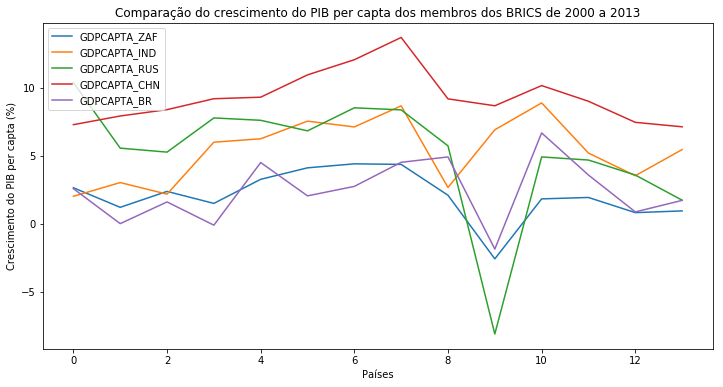

In [465]:
cgdp24.plot(figsize=(12, 6),rot=0)
plt.legend(loc='upper left')
plt.xlabel("Países")
plt.ylabel("Crescimento do PIB per capta (%)")
plt.title("Comparação do crescimento do PIB per capta dos membros dos BRICS de 2000 a 2013")

Com o gráfico acima, pode-se observar que os BRICS não crescem uniformemente. Além disso a crise de 2008 /2009 afetou todos os países com destaque para Rússia. Observando a faixa de 2000 a 2013 e “excluindo os dados de 2008/2009”, a tendência de crescimento dos países são muito próximas, deixando cada vez mais evidente uma indiferença econômica na criação do grupo político.   

Text(0.5, 1.0, 'Comparação do crescimento do IDH dos membros dos BRICS de 2000 a 2013')

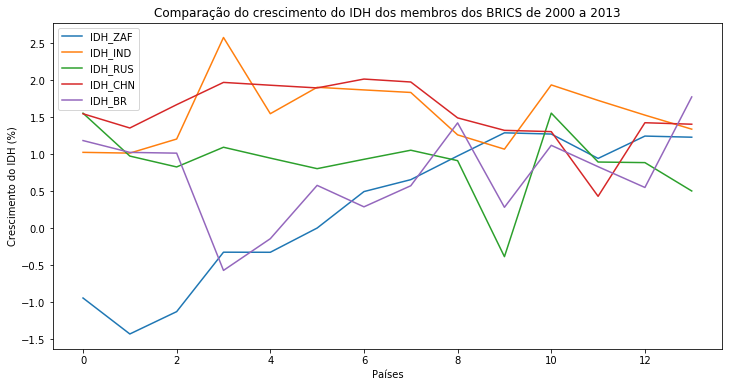

In [466]:
cidh4.plot(figsize=(12, 6),rot=0)
plt.legend(loc='upper left')
plt.xlabel("Países")
plt.ylabel("Crescimento do IDH (%)")
plt.title("Comparação do crescimento do IDH dos membros dos BRICS de 2000 a 2013")

Assim como o gráfico de crescimento do PIB per capta, o gráfico acima mostra que de 2010 a 2013 o crescimento do IDH já era previsto, dada a tendência de crescimento dos anos anteriores em todos os países.

Text(0.5, 1.0, 'Comparação do crescimento dos usuários de internet dos membros dos BRICS de 2000 a 2013')

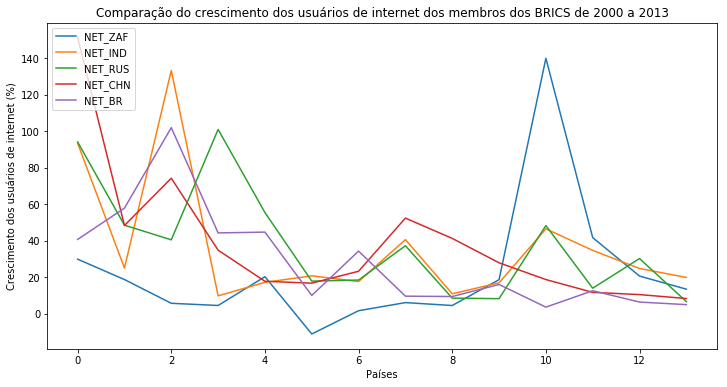

In [467]:
cnet4.plot(figsize=(12, 6),rot=0)
plt.legend(loc='upper left')
plt.xlabel("Países")
plt.ylabel("Crescimento dos usuários de internet (%)")
plt.title("Comparação do crescimento dos usuários de internet dos membros dos BRICS de 2000 a 2013")

O gráfico acima mostra o grande crescimento do número de usuários de internet no mesmo ano em que o grupo político foi formado, porém a tal formação não pode ser usada como justificativa para tal crescimento pois esse fator não ocorreu na mesma magnitude nos outros países. Além disso com exceção da África do Sul, a tendência de crescimento dos países antes e depois da formação dos BRICS são muito semelhantes, assim mostrando baixa influencia da formação deste grupo no crescimento do índice em questão.  

Text(0.5, 1.0, 'Comparação do crescimento do setor industrial dos membros dos BRICS de 2000 a 2013')

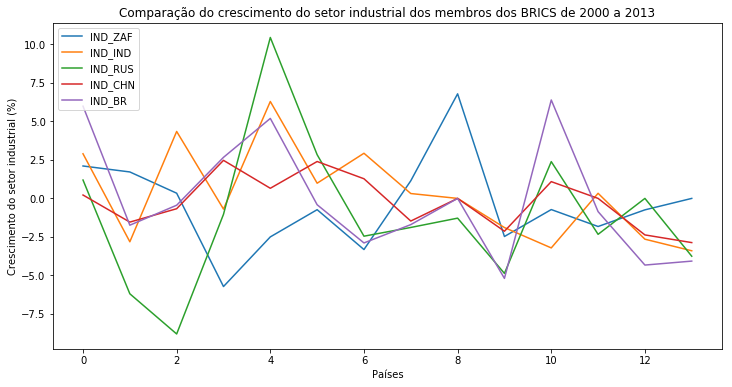

In [468]:
cind4.plot(figsize=(12, 6),rot=0)
plt.legend(loc='upper left')
plt.xlabel("Países")
plt.ylabel("Crescimento do setor industrial (%)")
plt.title("Comparação do crescimento do setor industrial dos membros dos BRICS de 2000 a 2013")

Assim como nas análises anteriores, o gráfico acima mostra uma semelhança taxa de crescimento do setor industrial, o que significa que a formação dos BRICS não causou impacto para o crescimento do setor ou para seu decrescimento. 

Text(0.5, 1.0, 'Comparação do crescimento de investimentos nos países membros dos BRICS de 2000 a 2013')

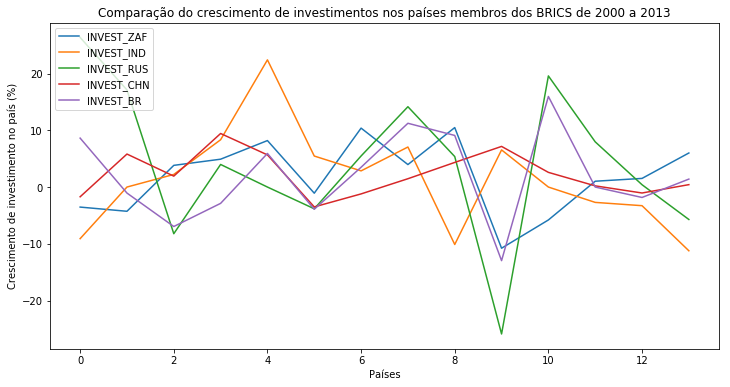

In [469]:
cinv4.plot(figsize=(12, 6),rot=0)
plt.legend(loc='upper left')
plt.xlabel("Países")
plt.ylabel("Crescimento de investimento no país (%)")
plt.title("Comparação do crescimento de investimentos nos países membros dos BRICS de 2000 a 2013")

Os gráficos anteriores mostraram uma semelhança na taxa de crescimento da variável analisada. No gráfico acima não é diferente, o que mais uma vez mostra que a formação dos BRICS não causou impacto para o crescimento de investimentos nos países. 

Text(0.5, 1.0, 'Comparação do crescimento do PIB dos países membros dos BRICS de 2000 a 2013')

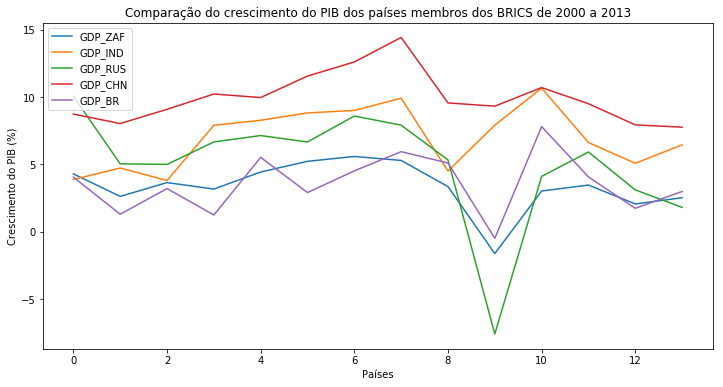

In [470]:
cgdp4.plot(figsize=(12, 6),rot=0)
plt.legend(loc='upper left')
plt.xlabel("Países")
plt.ylabel("Crescimento do PIB (%)")
plt.title("Comparação do crescimento do PIB dos países membros dos BRICS de 2000 a 2013")

O gráfico acima descreve o crescimento do PIB de cada país membro do BRICS. Excluindo os dados dos anos de 2008 e 2009 (onde ocorreu uma mudança brusca nos dados, devido à crise mundial), a taxa de crescimento do PIB é muito próxima do que já era antes da formação do grupo político.

## Conclusão

Primeiramente foi realizado uma análise comparativa entre os anos de 2010 e 2013, para poder visualizar se a formação dos BRICS teve algum impacto nos crescimentos sociais e econômicos dos seus países membros. Logo na primeira análise já apareceram alguns indícios de que o crescimento de 2010 – 2013, não teria sido causado pela formação do grupo político, uma vez que países como Chile e Equador também apresentaram, de modo geral, semelhante crescimento. Partindo para uma análise mais profunda, foi analisado o percentual de crescimento de cada uma das varáveis disponíveis (PIB per capta, PIB, percentual da população que utilizam internet, setor industrial, investimentos no país e IDH), a partir dos gráficos obtidos nessa seção, ficou claro que a China e a Índia estavam se destacando em relação aos outros países, porém ficou mais evidente que, pelo percentual de crescimento na maioria da variáveis analisadas, não ocorreu algum impacto causado pela formação dos BRICS. Para concluir foi feita uma analise do percentual de crescimento anual dos países membros dos BRICS, entre 2000 a 2013. Após analisar os gráficos obtidos ficou evidente que as taxas de crescimento dos índices após a formação dos BRICS, foram muito próximas dessa forma causando impacto nulo para o crescimento de tais variáveis. Por fim, a hipótese foi refutada, uma vez que os países membros dos BRICS não tiveram alteração em suas taxas de crescimentos (índices analisados) após a formação do grupo. 